<a href="https://colab.research.google.com/github/marianabcastro/portfolio/blob/main/New_York_City_School_Bus_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City School Bus Delays 🚌**
##### by Mariana Castro and Susanna Granieri

---



#### After over a year of remote learning, New York City school buses were back on the road for the 2020-2021 school year, but, complaints of late buses, or even no-shows, occur often. Data surrounding these delays, including delay times, vendors, school addresses and boroughs, paint an assumed, but question-provoking picture.
 

---

#### We decided to look into New York City's [school bus delay data](https://data.cityofnewyork.us/Education/School-Bus-Delays-Report-October_2021_1173B_21-994/c6ph-pcpz). This dataset, which was shared on NYC OpenData, was last updated on Nov. 24, 2021. It includes all bus delays between January and June 2021, as well as the legnth of those delays, the reason, the Office of Pupil Transportation (OPT), the route identifier, the run type (AM or PM) and the date the delay occured.

#### Below, we loaded in OPT code information, which provides the school name, their addresses, phone numbers, district, borough, and the type of school.

In [ ]:
# upload dataset with OPT school codes | variable = schools

from pandas import read_csv

from google.colab import files
from io import BytesIO

uploaded = files.upload()

schools = read_csv(BytesIO(uploaded['OPT_ATS_codes.csv']))
schools = schools.rename(columns={"OPT School Codes": "School"})

schools

Saving OPT_ATS_codes.csv to OPT_ATS_codes.csv


School ATS Code  ... Type of School Building Code
0       2047   02M047  ...         Public          M047
1      75665      NaN  ...    non nyc pub           NaN
2      15801      NaN  ...      Christian           NaN
3       6577   06M540  ...         Public          M540
4      24290   24Q290  ...         Public          Q290
...      ...      ...  ...            ...           ...
4307   12632   84X632  ...        Charter          XCHM
4308    9631   84X631  ...        Charter          XCGI
4309    6373   84M373  ...        Charter          MAXH
4310    6014   84M373  ...        Charter          MAXH
4311   22755      NaN  ...        Yeshiva           NaN

[4312 rows x 9 columns]

#### Next, we loaded in the bus delay report.

In [ ]:
#upload main dabatase of school bus delays — source: OpenData | variable = buses

import pandas as pd
from pandas import read_csv

from google.colab import files
from io import BytesIO

uploaded = files.upload()

buses = read_csv(BytesIO(uploaded['Latest_School_Bus_Delays_Report_October_2021_1173B_21-994 (1).csv']))
buses = buses.rename(columns={"Schools": "School"})
pd.set_option('display.max_columns', None)
buses

Saving Latest_School_Bus_Delays_Report_October_2021_1173B_21-994 (1).csv to Latest_School_Bus_Delays_Report_October_2021_1173B_21-994 (1).csv


Id                          VendorName Route RunType          Type  \
0      322425      PRIDE TRANSPORTATION (SCH AGE)  k206  PM Run  Running Late   
1      322429           LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
2      322429           LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
3      322429           LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
4      322433           LITTLE RICHIE BUS SERVICE  q600  PM Run     Breakdown   
...       ...                                 ...   ...     ...           ...   
27967  338590                 G.V.C. LTD. (B2192)  y508  AM Run  Running Late   
27968  341731               VAN TRANS LLC (B2192)  y512  AM Run  Running Late   
27969  339992  LEESEL TRANSPORTATION CORP (B2192)  y900  AM Run  Running Late   
27970  339992  LEESEL TRANSPORTATION CORP (B2192)  y900  AM Run  Running Late   
27971  339992  LEESEL TRANSPORTATION CORP (B2192)  y900  AM Run  Running Late   

              Reason      Delay School  School Reported DateOccured  
0              Other  61-90 Min  21735            False  2021-01-06  
1        Won`t Start        NaN  19020            False  2021-01-06  
2        Won`t Start        NaN  19279            False  2021-01-06  
3        Won`t Start        NaN  19551            False  2021-01-06  
4        Won`t Start        NaN  24007            False  2021-01-06  
...              ...        ...    ...              ...         ...  
27967  Heavy Traffic  16-30 Min  11910            False  2021-06-02  
27968          Other  16-30 Min  11910            False  2021-06-23  
27969  Heavy Traffic  46-60 Min  10009            False  2021-06-10  
27970  Heavy Traffic  46-60 Min  10391            False  2021-06-10  
27971  Heavy Traffic  46-60 Min  10497            False  2021-06-10  

[27972 rows x 10 columns]

In [ ]:
# show the column names for both datasets — schools & buses
print(schools.columns)
print(buses.columns)
print(schools.index.name)
print(buses.index.name)

schools.School.astype(str)
buses.School.astype(str)

Index(['School', 'ATS Code', 'School Name', 'Address', 'Phone', 'District',
       'Borough', 'Type of School', 'Building Code'],
      dtype='object')
Index(['Id', 'VendorName', 'Route', 'RunType', 'Type', 'Reason', 'Delay',
       'School', 'School Reported', 'DateOccured'],
      dtype='object')
None
None


0        21735
1        19020
2        19279
3        19551
4        24007
         ...  
27967    11910
27968    11910
27969    10009
27970    10391
27971    10497
Name: School, Length: 27972, dtype: object

#### Now that both datasets are loaded into the pandas system, we can merge them so that the Office of Pupil Transportation (OPT) code (column `School` in the schools set) correlates with the `Id` column in the buses dataset.



In [ ]:
#schools.reset_index(inplace=True)
#buses.reset_index(inplace=True)

#schools.set_index('School', inplace=True)
#buses.set_index('School', inplace=True)

print(schools.columns)
print(buses.columns)
print(schools.index.name)
print(buses.index.name)

new_schools = schools.merge(buses, how="inner", left_index=True, right_index=True, right_on= "School", left_on="School")
#pd.set_option('display.max_rows', None)

#new_schools
new_schools

Index(['School', 'ATS Code', 'School Name', 'Address', 'Phone', 'District',
       'Borough', 'Type of School', 'Building Code'],
      dtype='object')
Index(['Id', 'VendorName', 'Route', 'RunType', 'Type', 'Reason', 'Delay',
       'School', 'School Reported', 'DateOccured'],
      dtype='object')
None
None


School  School_x ATS Code                     School Name  \
0       2047      2047   02M047  47 AMER.SIGN LANG.& ENGL. SCH.   
1      75665     75665      NaN         A B DAVIS MIDDLE SCHOOL   
2      15801     15801      NaN                 A FANTIS SCHOOL   
3       6577      6577   06M540    A. PHILIP RANDOLPH CAMPUS HS   
4      24290     24290   24Q290     A.C.E. ACADEMY FOR SCHOLARS   
...      ...       ...      ...                             ...   
4307   12632     12632   84X632   Zeta Charter School - Bronx 2   
4308    9631      9631   84X631   Zeta Charter School - Bronx 3   
4309    6373      6373   84M373    Zeta Charter School - Inwood   
4310    6014      6014   84M373  Zeta Charter School - Inwood 1   
4311   22755     22755      NaN            ZVI DOV ROTH ACADEMY   

                                        Address           Phone District  \
0         223 EAST 23 STREET Manhattan NY 10010  (917) 326-6668        2   
1        350 GRAMATAN AVENUE MT VERNON NY 10552  (914) 665-5120      00*   
2            195 STATE STREET Brooklyn NY 11201  (718) 624-0501       15   
3         443 WEST 135 STREET New York NY 10031  (212) 690-6800        6   
4     55-20 METROPOLITAN AVENUE Queens NY 11385  (718) 571-6900       24   
...                                         ...             ...      ...   
4307          1910 Arthur Avenue Bronx NY 10457  (929) 458-3000       12   
4308          1325 Jerome Avenue Bronx NY 10452  (929) 458-3000        9   
4309    652 WEST 187TH STREET New York NY 10033  (646) 897-4638        6   
4310     500 West 138 Street Manhattan NY 10031  (929) 447-5281        6   
4311       3300 KINGS HIGHWAY Brooklyn NY 11234  (718) 677-5100       22   

        Borough Type of School Building Code      Id  \
0     Manhattan         Public          M047  322425   
1     MT VERNON    non nyc pub           NaN  322429   
2      Brooklyn      Christian           NaN  322429   
3     Manhattan         Public          M540  322429   
4        Queens         Public          Q290  322433   
...         ...            ...           ...     ...   
4307      Bronx        Charter          XCHM  324968   
4308      Bronx        Charter          XCGI  324968   
4309  Manhattan        Charter          MAXH  324969   
4310  Manhattan        Charter          MAXH  324987   
4311   Brooklyn        Yeshiva           NaN  324995   

                               VendorName Route RunType          Type  \
0          PRIDE TRANSPORTATION (SCH AGE)  k206  PM Run  Running Late   
1               LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
2               LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
3               LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
4               LITTLE RICHIE BUS SERVICE  q600  PM Run     Breakdown   
...                                   ...   ...     ...           ...   
4307  RELIANT TRANSPORTATION, INC (B2321)  r292  PM Run  Running Late   
4308  RELIANT TRANSPORTATION, INC (B2321)  r292  PM Run  Running Late   
4309                   BORO TRANSIT, INC.  m017  AM Run  Running Late   
4310            HOYT TRANSPORTATION CORP.  q421  AM Run  Running Late   
4311            HOYT TRANSPORTATION CORP.  y243  AM Run     Breakdown   

                  Reason      Delay School_y  School Reported DateOccured  
0                  Other  61-90 Min    21735            False  2021-01-06  
1            Won`t Start        NaN    19020            False  2021-01-06  
2            Won`t Start        NaN    19279            False  2021-01-06  
3            Won`t Start        NaN    19551            False  2021-01-06  
4            Won`t Start        NaN    24007            False  2021-01-06  
...                  ...        ...      ...              ...         ...  
4307       Heavy Traffic  31-45 Min    31459            False  2021-02-22  
4308       Heavy Traffic  31-45 Min    31469            False  2021-02-22  
4309       Heavy Traffic  31-45 Min    06012          

#### The new columns, `School` and `School_x`, now match.

In [ ]:
#merge both tables
from pandas import to_numeric
schools["sSchool"] = schools["School"].astype(str)

new_buses = buses.merge(schools, how="left", right_on= "sSchool", left_on="School")

new_buses

Id                          VendorName Route RunType          Type  \
0      322425      PRIDE TRANSPORTATION (SCH AGE)  k206  PM Run  Running Late   
1      322429           LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
2      322429           LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
3      322429           LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
4      322433           LITTLE RICHIE BUS SERVICE  q600  PM Run     Breakdown   
...       ...                                 ...   ...     ...           ...   
27967  338590                 G.V.C. LTD. (B2192)  y508  AM Run  Running Late   
27968  341731               VAN TRANS LLC (B2192)  y512  AM Run  Running Late   
27969  339992  LEESEL TRANSPORTATION CORP (B2192)  y900  AM Run  Running Late   
27970  339992  LEESEL TRANSPORTATION CORP (B2192)  y900  AM Run  Running Late   
27971  339992  LEESEL TRANSPORTATION CORP (B2192)  y900  AM Run  Running Late   

              Reason      Delay School_x  School Reported DateOccured  \
0              Other  61-90 Min    21735            False  2021-01-06   
1        Won`t Start        NaN    19020            False  2021-01-06   
2        Won`t Start        NaN    19279            False  2021-01-06   
3        Won`t Start        NaN    19551            False  2021-01-06   
4        Won`t Start        NaN    24007            False  2021-01-06   
...              ...        ...      ...              ...         ...   
27967  Heavy Traffic  16-30 Min    11910            False  2021-06-02   
27968          Other  16-30 Min    11910            False  2021-06-23   
27969  Heavy Traffic  46-60 Min    10009            False  2021-06-10   
27970  Heavy Traffic  46-60 Min    10391            False  2021-06-10   
27971  Heavy Traffic  46-60 Min    10497            False  2021-06-10   

       School_y ATS Code                     School Name  \
0       21735.0      NaN        YESHIVA OF BROOKLYN BOYS   
1       19020.0   75K004                   P004K @ P667K   
2       19279.0   19K659   CYPRESS HILLS COLLEGIATE PREP   
3       19551.0   19K615   East New York Transit Tech HS   
4       24007.0   24Q007                     P.S. 7 Main   
...         ...      ...                             ...   
27967   11910.0      NaN       LAVELLE SCH FOR THE BLIND   
27968   11910.0      NaN       LAVELLE SCH FOR THE BLIND   
27969   10009.0   10X009                          P.S. 9   
27970   10391.0   10X391                         M.S.391   
27971   10497.0   10X225  THEATER ARTS PRODUCTION CO.SCH   

                                      Address           Phone District  \
0        1200 OCEAN PARKWAY Brooklyn NY 11230  (718) 252-9500       21   
1      3269 Atlantic Avenue Brooklyn NY 11208  (929) 480-2130       19   
2        999 JAMAICA AVENUE Brooklyn NY 11208  (718) 647-1672       19   
3            1 WELLS STREET Brooklyn NY 11208  (718) 647-5204       19   
4        80-55 CORNISH AVENUE Queens NY 11373  (718) 446-2726       24   
...                                       ...             ...      ...   
27967     3830 PAULDING AVENUE Bronx NY 10469  (718) 882-1212       11   
27968     3830 PAULDING AVENUE Bronx NY 10469  (718) 882-1212       11   
27969      230 EAST 183 STREET Bronx NY 10458  (718) 584-3291       10   
27970      2225 WEBSTER AVENUE Bronx NY 10457  (718) 584-0980       10   
27971      2225 WEBSTER AVENUE Bronx NY 10457  (718) 584-0832       10   

        Borough Type of School Building Code sSchool  
0      Brooklyn        Yeshiva           NaN   21735  
1      Brooklyn         Public          K273   19020  
2      Brooklyn         Public          K420   19279  
3      Brooklyn         Public          K615   19551  
4        Queens         Public          Q007   24007  
...         ...            ...           ...     ...  
27967     Bronx   Nonsectarian           NaN   11910  
27968     Bronx   Nonsectarian           NaN   11910  
27969     Bronx         Public          X009   10009  
2

In [ ]:
new_buses.head()

Id                      VendorName Route RunType          Type  \
0  322425  PRIDE TRANSPORTATION (SCH AGE)  k206  PM Run  Running Late   
1  322429       LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
2  322429       LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
3  322429       LORINDA ENTERPRISES, LTD.  l693  AM Run     Breakdown   
4  322433       LITTLE RICHIE BUS SERVICE  q600  PM Run     Breakdown   

        Reason      Delay School_x  School Reported DateOccured  School_y  \
0        Other  61-90 Min    21735            False  2021-01-06   21735.0   
1  Won`t Start        NaN    19020            False  2021-01-06   19020.0   
2  Won`t Start        NaN    19279            False  2021-01-06   19279.0   
3  Won`t Start        NaN    19551            False  2021-01-06   19551.0   
4  Won`t Start        NaN    24007            False  2021-01-06   24007.0   

  ATS Code                    School Name  \
0      NaN       YESHIVA OF BROOKLYN BOYS   
1   75K004                  P004K @ P667K   
2   19K659  CYPRESS HILLS COLLEGIATE PREP   
3   19K615  East New York Transit Tech HS   
4   24Q007                    P.S. 7 Main   

                                  Address           Phone District   Borough  \
0    1200 OCEAN PARKWAY Brooklyn NY 11230  (718) 252-9500       21  Brooklyn   
1  3269 Atlantic Avenue Brooklyn NY 11208  (929) 480-2130       19  Brooklyn   
2    999 JAMAICA AVENUE Brooklyn NY 11208  (718) 647-1672       19  Brooklyn   
3        1 WELLS STREET Brooklyn NY 11208  (718) 647-5204       19  Brooklyn   
4    80-55 CORNISH AVENUE Queens NY 11373  (718) 446-2726       24    Queens   

  Type of School Building Code sSchool  
0        Yeshiva           NaN   21735  
1         Public          K273   19020  
2         Public          K420   19279  
3         Public          K615   19551  
4         Public          Q007   24007

#### Our next step was to filter out the `Reason` column by `Mechanical Problem`. We decided to do this because we were curious how many buses were delayed due to mechanical issues.

In [ ]:
#filter out reason by "mechanical problem" 

problems2 = new_buses[new_buses.Reason == "Mechanical Problem"]
problems2.head()

Id                           VendorName Route RunType          Type  \
11  322532       PRIDE TRANSPORTATION (SCH AGE)  q955  AM Run  Running Late   
20  322556                   BORO TRANSIT, INC.  k109  AM Run  Running Late   
21  322556                   BORO TRANSIT, INC.  k109  AM Run  Running Late   
26  322569  RELIANT TRANSPORTATION, INC (B2321)  k597  PM Run     Breakdown   
27  322569  RELIANT TRANSPORTATION, INC (B2321)  k597  PM Run     Breakdown   

                Reason      Delay School_x  School Reported DateOccured  \
11  Mechanical Problem  31-45 Min    24755            False  2021-01-08   
20  Mechanical Problem  31-45 Min    14023            False  2021-01-08   
21  Mechanical Problem  31-45 Min    14435            False  2021-01-08   
26  Mechanical Problem        NaN    20164            False  2021-01-11   
27  Mechanical Problem        NaN    20223            False  2021-01-11   

    School_y ATS Code                     School Name  \
11   24755.0      NaN         TIEGERMAN MIDDLE SCHOOL   
20   14023.0   14K023                         P.S. 23   
21   14435.0   75K373  P373K @ BROOKYN TRANSITION CTR   
26   20164.0   20K164                        P.S. 164   
27   20223.0   20K223                         JHS 223   

                                    Address           Phone District  \
11      70-24 47TH AVENUE WOODSIDE NY 11377  (718) 476-7163       24   
20  545 WILLOUGHBY AVENUE Brooklyn NY 11206  (718) 387-0375       14   
21      185 ELLERY STREET Brooklyn NY 11206  (718) 782-6800       14   
26       4211 14TH AVENUE Brooklyn NY 11219  (718) 854-4100       20   
27       4200 16TH AVENUE Brooklyn NY 11204  (718) 438-0155       20   

     Borough Type of School Building Code sSchool  
11    Queens   Nonsectarian           NaN   24755  
20  Brooklyn         Public          K023   14023  
21  Brooklyn         Public          K148   14435  
26  Brooklyn         Public          K164   20164  
27  Brooklyn         Public          K223   20223

#### Since we filtered out by `Mechanical Problem`, we wanted to count how many each vendor resported. Is there any particular company that is responsible for the most bus delays attributed to mechanical problems?

In [ ]:
problems2['VendorName'].value_counts()

BORO TRANSIT, INC.                     542
RELIANT TRANSPORTATION, INC (B2321)    222
SNT BUS INC                            221
PRIDE TRANSPORTATION (SCH AGE)         203
HOYT TRANSPORTATION CORP.              200
QUALITY TRANSPORTATION CORP.           197
LITTLE RICHIE BUS SERVICE              181
PIONEER TRANSPORTATION CORP            158
JOFAZ TRANSPORTATION INC.              125
LORINDA ENTERPRISES, LTD.              114
LEESEL TRANSPORTATION CORP (B2192)     107
Y & M TRANSIT CORP (B2192)              88
GRANDPA`S BUS CO., INC.                 76
BOBBY`S BUS CO. INC.                    71
L & M BUS CORP (A)                      59
CONSOLIDATED BUS TRANSIT, INC.          54
LOGAN BUS COMPANY INC.                  53
ALLIED TRANSIT CORP.                    42
FIRST STEPS TRANS INC. (B2192)          39
G.V.C., LTD.                            35
LORISSA BUS SERVICE INC.                29
B & F SKILLED INC.(B2192)               29
DON THOMAS BUSES, INC.                  25
VAN TRANS L

#### But, were mechanical problems the top reason for bus delays?

In [ ]:
delays = new_buses['Reason'].value_counts()
delays=delays.reset_index()
delays.head()

index  Reason
0       Heavy Traffic   18143
1               Other    4078
2  Mechanical Problem    3109
3         Won`t Start     770
4           Flat Tire     714

#### No. `Heavy traffic` actually landed at number one, with 18,143, but we assume is due to New York City congestion. `Other` came in second, which is not described in the data dictionary.  So we focused on the third.



---



#### We looked into the top five companies on the list above: `Boro Transit, Inc.`, `SNT Bus Inc.`, `Pride Transportation`, `Quality Transportation Corp.` and `Reliant Transportation, Inc.`

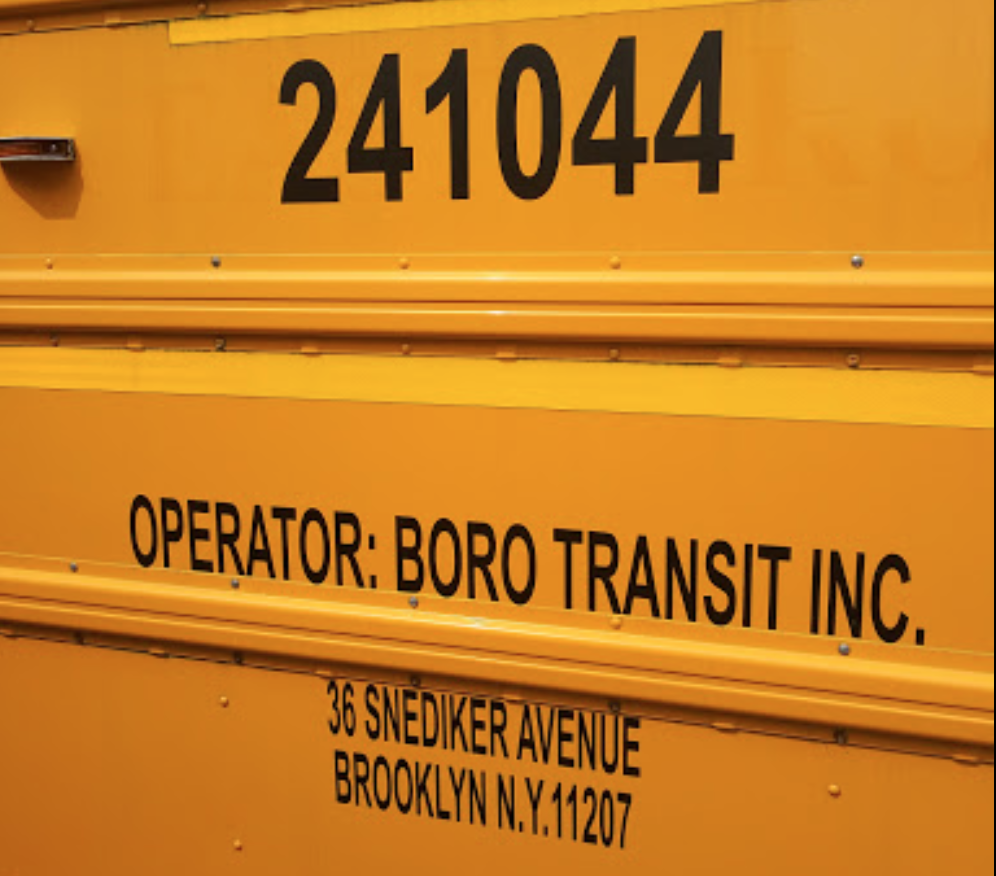

#### We found that `Boro Transit, Inc.` and `SNT Bus Inc.` are located at the same address (50 Snediker Avenue, Brooklyn, NY 11207), have the same phone number (718-346-9600), email address (consolidatedbus@cbttrans.com). In further investigation, we found that [Jodi](https://opencorporates.com/companies/us_ny/1833457) [Curcio-Genovese](https://opencorporates.com/companies/us_ny/4503916) is the owner of the two companies. *We hope to speak with her and ask why the DOE entered the companies in separately when they are consolidated.*

#### It seems as though the companies consolidated to become [Consolidated Bus Transit Inc.](https://consolidatedbustransit.com/about/history/) When you Google `SNT Bus Inc.`, the address for Consolidated Bus Transit is also a result. But the address is 38 Snediker on Google, but on their website it is 68 Snediker — not 50 Snediker like `Boro Transit, Inc.`


In [ ]:
type('BORO TRANSIT, INC.')

str

#### Boro Transit, Inc., after searching for it on [Google](https://www.google.com/search?q=%22JODI+GENOVESE%22+%22boro+transit%22&oq=%22JODI+GENOVESE%22+%22boro+transit%22&aqs=chrome..69i57j33i160l2.4941j0j4&sourceid=chrome&ie=UTF-8#lrd=0x89c25c454a4f9cc9:0x3100a75fd24ff732,1 	), shows a 1.6/5 star rating based on nine reviews. Most, if not all, were not complimentary of the company.


> “My daughter has special needs and goes to a private school, we were told by the bus coordinator at the school no masks were required on the bus as she falls under the exceptions outlined by OPT,” wrote reviewer Joe R M last year. “First day of school, she came home with a mask around her neck, red marks behind her head and ears ,smelling of latex around her face and hair, and in complete distress because apparently she was FORCED into the mask by the matron and or driver! That's assault.”

#### Their lateness is assumed due to the 542 delays caused by mechanical problems.



> “[Their] service sucks. I was waiting for 2 hours for my son to be [picked] up at 6:30 a.m. and they never arrived. No one called me to tell me anything, nor the bus driving or the company,” another reviewer wrote. “I called them thousands of times and their phone was always busy and I finally got through and the woman [who picked up] was rude and didn’t care, she said anything to get me off the phone. So I made a report on them. [Their] service sucks.”

### Quality Transportation Corp.
#### New York City, according to the [New York Post](https://nypost.com/2020/02/29/bus-that-killed-girl-is-run-by-company-with-huge-270m-city-contract/), granted a pay increase to Quality Transportation Corp. Their contract was extended, and their pay "rose from an original $22.9 million for one year in 2014 to $270.3 million for nine years through June 2023." The safety of these companies had not been checked, nor the experiences reported by loved ones and students. Last year, 10-year-old Patience Albert was [struck and killed](https://nypost.com/2020/02/25/brooklyn-girl-killed-by-school-bus-driver-was-funny-and-extremely-smart-family-says/) by Pedro Colin, 61, after he turned at a four-way intersection and Albert was crossing the street — there were stop signs on all four streets.

#### Back in September, the issues with NYC's bus companies, although living with a bad track-record, were a real-time, live issue. After the pandemic shut down New York City schools for over a year, many students were excited for their first day back — but their school buses never showed. [Chalkbeat reported](https://ny.chalkbeat.org/2021/9/13/22672760/school-buses-leave-nyc-students-stranded-on-first-day) that, at the time, almost 1 million students were going to school for the first time since the pandemic, but parents reported delays and complained to OPT. At the time of the article, though, there was no data backing up this experience because school's had been closed for so long. Now, with the new bus delay data, the extent of the issues can actually be quantified and analyzed.



---


### Here, we decided to just manipulate the data in different ways.


---

In [ ]:
new_buses.shape

(27972, 20)

In [ ]:
#how many incidents did each company have per borough?

problems2.groupby("VendorName")["Borough"].value_counts()

VendorName                     Borough       
ALL AMERICAN SCHOOL BUS CORP.  Brooklyn           6
                               Queens             5
                               Glen Cove          1
ALLIED TRANSIT CORP.           Brooklyn          32
                               Queens            10
                                                 ..
THOMAS BUSES, INC. (B2321)     WEST HEMPSTEAD     1
VAN TRANS LLC (B2192)          Bronx             11
                               ALBERTSON          1
VINNY`S BUS SERVICES (B2321)   Staten Island      1
Y & M TRANSIT CORP (B2192)     Brooklyn          88
Name: Borough, Length: 102, dtype: int64

In [ ]:
type(schools["School"][0])

numpy.int64

In [ ]:
type(buses["School"][0])

str

## Geocoding the Data


---


#### We thought it would be interesting to see all the schools effected by bus delays caused by mechanical problems on a map.


---

In [ ]:
#geotag schools 

!pip install geopy
from geopy.geocoders import Nominatim

!pip install folium
import folium

In [ ]:
# import pandas as pd  
import pandas as pd  

#create DataFrame from problems2 table  
df_problems2 = pd.DataFrame(problems2)

print(df_problems2)

           Id                           VendorName Route RunType  \
11     322532       PRIDE TRANSPORTATION (SCH AGE)  q955  AM Run   
20     322556                   BORO TRANSIT, INC.  k109  AM Run   
21     322556                   BORO TRANSIT, INC.  k109  AM Run   
26     322569  RELIANT TRANSPORTATION, INC (B2321)  k597  PM Run   
27     322569  RELIANT TRANSPORTATION, INC (B2321)  k597  PM Run   
...       ...                                  ...   ...     ...   
27909  340708       PRIDE TRANSPORTATION (SCH AGE)  y227  PM Run   
27910  340708       PRIDE TRANSPORTATION (SCH AGE)  y227  PM Run   
27911  340708       PRIDE TRANSPORTATION (SCH AGE)  y227  PM Run   
27920  341519       DON THOMAS BUSES, INC. (B2321)  y237  AM Run   
27921  341519       DON THOMAS BUSES, INC. (B2321)  y237  AM Run   

               Type              Reason      Delay School_x  School Reported  \
11     Running Late  Mechanical Problem  31-45 Min    24755            False   
20     Running Late  Me

In [ ]:
#create new column
df_problems2["address"] = df_problems2.Address

print(df_problems2.head())

        Id                           VendorName Route RunType          Type  \
11  322532       PRIDE TRANSPORTATION (SCH AGE)  q955  AM Run  Running Late   
20  322556                   BORO TRANSIT, INC.  k109  AM Run  Running Late   
21  322556                   BORO TRANSIT, INC.  k109  AM Run  Running Late   
26  322569  RELIANT TRANSPORTATION, INC (B2321)  k597  PM Run     Breakdown   
27  322569  RELIANT TRANSPORTATION, INC (B2321)  k597  PM Run     Breakdown   

                Reason      Delay School_x  School Reported DateOccured  \
11  Mechanical Problem  31-45 Min    24755            False  2021-01-08   
20  Mechanical Problem  31-45 Min    14023            False  2021-01-08   
21  Mechanical Problem  31-45 Min    14435            False  2021-01-08   
26  Mechanical Problem        NaN    20164            False  2021-01-11   
27  Mechanical Problem        NaN    20223            False  2021-01-11   

    School_y ATS Code                     School Name  \
11   24755.0     

In [ ]:
#drop columns we don't want

df_problems2 = df_problems2.drop(['Id', 'Route', 'RunType', 'School_x', 'School Reported', 'School_y', 'ATS Code', 'Phone', 'District', 'Building Code', 'sSchool', 'Address'], axis=1)
df_problems2.head()

VendorName          Type              Reason  \
11       PRIDE TRANSPORTATION (SCH AGE)  Running Late  Mechanical Problem   
20                   BORO TRANSIT, INC.  Running Late  Mechanical Problem   
21                   BORO TRANSIT, INC.  Running Late  Mechanical Problem   
26  RELIANT TRANSPORTATION, INC (B2321)     Breakdown  Mechanical Problem   
27  RELIANT TRANSPORTATION, INC (B2321)     Breakdown  Mechanical Problem   

        Delay DateOccured                     School Name   Borough  \
11  31-45 Min  2021-01-08         TIEGERMAN MIDDLE SCHOOL    Queens   
20  31-45 Min  2021-01-08                         P.S. 23  Brooklyn   
21  31-45 Min  2021-01-08  P373K @ BROOKYN TRANSITION CTR  Brooklyn   
26        NaN  2021-01-11                        P.S. 164  Brooklyn   
27        NaN  2021-01-11                         JHS 223  Brooklyn   

   Type of School                                  address  
11   Nonsectarian      70-24 47TH AVENUE WOODSIDE NY 11377  
20         Public  545 WILLOUGHBY AVENUE Brooklyn NY 11206  
21         Public      185 ELLERY STREET Brooklyn NY 11206  
26         Public       4211 14TH AVENUE Brooklyn NY 11219  
27         Public       4200 16TH AVENUE Brooklyn NY 11204

In [ ]:
#Create a geolocator object using the Openstreet Nominatim API. Test it out.

geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
location = geolocator.geocode('4550 Kester Mill Rd,Winston-Salem,NC')
print(location)
print((location.latitude, location.longitude))

Walmart Supercenter, 4550, Kester Mill Road, Winston-Salem, Forsyth County, North Carolina, 27103, United States
(36.06752315, -80.3372069310351)


In [ ]:
from pandas import read_csv

from google.colab import files
from io import BytesIO

uploaded = files.upload()

map = read_csv(BytesIO(uploaded['problems with geocode.csv']))

map

Saving problems with geocode.csv to problems with geocode.csv


Unnamed: 0                           VendorName          Type  \
0             11       PRIDE TRANSPORTATION (SCH AGE)  Running Late   
1             20                   BORO TRANSIT, INC.  Running Late   
2             21                   BORO TRANSIT, INC.  Running Late   
3             26  RELIANT TRANSPORTATION, INC (B2321)     Breakdown   
4             27  RELIANT TRANSPORTATION, INC (B2321)     Breakdown   
...          ...                                  ...           ...   
2838       27909       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2839       27910       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2840       27911       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2841       27920       DON THOMAS BUSES, INC. (B2321)     Breakdown   
2842       27921       DON THOMAS BUSES, INC. (B2321)     Breakdown   

                  Reason      Delay DateOccured  \
0     Mechanical Problem  31-45 Min  2021-01-08   
1     Mechanical Problem  31-45 Min  2021-01-08   
2     Mechanical Problem  31-45 Min  2021-01-08   
3     Mechanical Problem        NaN  2021-01-11   
4     Mechanical Problem        NaN  2021-01-11   
...                  ...        ...         ...   
2838  Mechanical Problem        NaN  2021-06-15   
2839  Mechanical Problem        NaN  2021-06-15   
2840  Mechanical Problem        NaN  2021-06-15   
2841  Mechanical Problem        NaN  2021-06-22   
2842  Mechanical Problem        NaN  2021-06-22   

                         School Name   Borough Type of School  \
0            TIEGERMAN MIDDLE SCHOOL    Queens   Nonsectarian   
1                            P.S. 23  Brooklyn         Public   
2     P373K @ BROOKYN TRANSITION CTR  Brooklyn         Public   
3                           P.S. 164  Brooklyn         Public   
4                            JHS 223  Brooklyn         Public   
...                              ...       ...            ...   
2838                             NaN       NaN            NaN   
2839                             NaN       NaN            NaN   
2840                             NaN       NaN            NaN   
2841                         P.S. 83     Bronx         Public   
2842       NY INST FOR SPECIAL EDUC.     Bronx      Other Rel   

                                      address  \
0         70-24 47TH AVENUE WOODSIDE NY 11377   
1     545 WILLOUGHBY AVENUE Brooklyn NY 11206   
2         185 ELLERY STREET Brooklyn NY 11206   
3          4211 14TH AVENUE Brooklyn NY 11219   
4          4200 16TH AVENUE Brooklyn NY 11204   
...                                       ...   
2838                                      NaN   
2839                                      NaN   
2840                                      NaN   
2841    950 RHINELANDER AVENUE Bronx NY 10462   
2842        999 PELHAM PARKWAY Bronx NY 10469   

                                                  gcode  \
0     47th Avenue, Woodside, Queens, Queens County, ...   
1     Public School 23, 545, Willoughby Avenue, Broo...   
2     Junior High School 148 (historical), 185, Elle...   
3     Public School 164, 4211, 14th Avenue, Borough ...   
4     Urban Assembly School For Criminal Justice, 42...   
...                                                 ...   
2838  Nanno, Ville d'Anaunia, Comunità della Val di ...   
2839  Nanno, Ville d'Anaunia, Comunità della Val di ...   
2840  Nanno, Ville d'Anaunia, Comunità della Val di ...   
2841  Public School 83, 950, Rhinelander Avenue, Mor...   
2842  Institute for Education of the Blind, 999, Pel...   

                                             city_coord  \
0     47th Avenue, Woodside, Queens, Queens County, ...   
1     Public School 23, 545, Willoughby Avenue, Broo...   
2     Junior High School 148 (historical), 185, Elle...   
3     Public School 164, 4211, 14th Avenue, Borough ...   
4     Urban Assembly School For Criminal Justice, 42...   
...                                                 ...   
2838  Nanno, Ville d'Anaunia, Comunità della Val

In [ ]:
import pandas as pd

df_problems3 = pd.DataFrame(map)
print(map)

      Unnamed: 0                           VendorName          Type  \
0             11       PRIDE TRANSPORTATION (SCH AGE)  Running Late   
1             20                   BORO TRANSIT, INC.  Running Late   
2             21                   BORO TRANSIT, INC.  Running Late   
3             26  RELIANT TRANSPORTATION, INC (B2321)     Breakdown   
4             27  RELIANT TRANSPORTATION, INC (B2321)     Breakdown   
...          ...                                  ...           ...   
2838       27909       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2839       27910       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2840       27911       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2841       27920       DON THOMAS BUSES, INC. (B2321)     Breakdown   
2842       27921       DON THOMAS BUSES, INC. (B2321)     Breakdown   

                  Reason      Delay DateOccured  \
0     Mechanical Problem  31-45 Min  2021-01-08   
1     Mechanical Problem  31-45 Min  2021-01-

In [ ]:
#TEST

#df_problems2.address 
#df_problems2.latitude 
#df_problems2.longitude

# importing geopy library
from geopy.geocoders import Nominatim

# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

# entering the location name for test
getLoc = loc.geocode("70-24 47TH AVENUE WOODSIDE, NY, 11377")
  
# printing address
print(getLoc.address)
  
# printing latitude and longitude
print("Latitude = ", location.latitude, "\n")
print("Longitude = ", location.longitude)

47th Avenue, Woodside, Queens, Queens County, New York, 11377, United States
Latitude =  36.06752315 

Longitude =  -80.3372069310351


In [ ]:
def clean(x):
    if x:return((x.latitude, x.longitude))
    else: return x

In [ ]:
#launch map

my_map = folium.Map(location=(40.730610,-73.935242), zoom_start=11)
display(my_map)

In [ ]:
df_problems2=df_problems3.dropna(subset=['longitude'])

df_problems2=df_problems3.dropna(subset=['latitude'])

In [ ]:
print(df_problems2)

      Unnamed: 0                           VendorName          Type  \
0             11       PRIDE TRANSPORTATION (SCH AGE)  Running Late   
1             20                   BORO TRANSIT, INC.  Running Late   
2             21                   BORO TRANSIT, INC.  Running Late   
3             26  RELIANT TRANSPORTATION, INC (B2321)     Breakdown   
4             27  RELIANT TRANSPORTATION, INC (B2321)     Breakdown   
...          ...                                  ...           ...   
2838       27909       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2839       27910       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2840       27911       PRIDE TRANSPORTATION (SCH AGE)     Breakdown   
2841       27920       DON THOMAS BUSES, INC. (B2321)     Breakdown   
2842       27921       DON THOMAS BUSES, INC. (B2321)     Breakdown   

                  Reason      Delay DateOccured  \
0     Mechanical Problem  31-45 Min  2021-01-08   
1     Mechanical Problem  31-45 Min  2021-01-

In [ ]:
for index, row in df_problems3.iterrows():
  folium.Marker(location=(row['latitude'],row['longitude'])).add_to(my_map)

display(my_map)

In [ ]:
df_problems2['School Name'].fillna("",inplace=True)


for index, row in df_problems2.iterrows():
  folium.Marker(location=(row['latitude'],row['longitude']), popup=row['School Name']).add_to(my_map)
df_problems2.to_csv("problems with geocode.csv")

display(my_map)

#### This map represents every school that dealt with a delayed bus (whether one time, two times, or 10 times) between January and June of this past school year. The map, we noticed, was very clustered and showed the extent of the issue, as well as provided pop-ups of the names when the location point was clicked on, but visually it was difficult to see the real intensity behind the delays and how common they are. So, we decided to create a heatmap.

## Heatmap



---


#### In this heatmap, you can see the areas that are impacted by delays caused by mechanical problems (the intensity differs based on the high clustered areas in the location, pin-pointed map).


---



In [ ]:
import folium

# function to generate base map, has default values for zoom and tiles
def generateBaseMap(loc, zoom=12, tiles='Stamen Toner', crs='ESPG2263'):
    '''
    Function that generates a Folium base map
    Input location lat/long
    Zoom level default 12
    Tiles default to Stamen Toner
    CRS default 2263 for NYC
    '''
    return folium.Map(location=loc, 
                      control_scale=True, 
                      zoom_start=11,
                      tiles=tiles)
  
nyc = [40.7400, -73.985880] # generic nyc lat/lon in list format
base_map = generateBaseMap(nyc) # pass lat/lon to function
base_map

In [ ]:
import pandas as pd

# create pandas dataframe from tripdata
df = pd.read_csv('problems with geocode.csv',
                parse_dates=['DateOccured', 'Delay']) # read these columns in as datetime dtype
# preview dataframe
df

Unnamed: 0  Unnamed: 0.1                           VendorName  \
0              0            11       PRIDE TRANSPORTATION (SCH AGE)   
1              1            20                   BORO TRANSIT, INC.   
2              2            21                   BORO TRANSIT, INC.   
3              3            26  RELIANT TRANSPORTATION, INC (B2321)   
4              4            27  RELIANT TRANSPORTATION, INC (B2321)   
...          ...           ...                                  ...   
2838        2838         27909       PRIDE TRANSPORTATION (SCH AGE)   
2839        2839         27910       PRIDE TRANSPORTATION (SCH AGE)   
2840        2840         27911       PRIDE TRANSPORTATION (SCH AGE)   
2841        2841         27920       DON THOMAS BUSES, INC. (B2321)   
2842        2842         27921       DON THOMAS BUSES, INC. (B2321)   

              Type              Reason      Delay DateOccured  \
0     Running Late  Mechanical Problem  31-45 Min  2021-01-08   
1     Running Late  Mechanical Problem  31-45 Min  2021-01-08   
2     Running Late  Mechanical Problem  31-45 Min  2021-01-08   
3        Breakdown  Mechanical Problem        NaN  2021-01-11   
4        Breakdown  Mechanical Problem        NaN  2021-01-11   
...            ...                 ...        ...         ...   
2838     Breakdown  Mechanical Problem        NaN  2021-06-15   
2839     Breakdown  Mechanical Problem        NaN  2021-06-15   
2840     Breakdown  Mechanical Problem        NaN  2021-06-15   
2841     Breakdown  Mechanical Problem        NaN  2021-06-22   
2842     Breakdown  Mechanical Problem        NaN  2021-06-22   

                         School Name   Borough Type of School  \
0            TIEGERMAN MIDDLE SCHOOL    Queens   Nonsectarian   
1                            P.S. 23  Brooklyn         Public   
2     P373K @ BROOKYN TRANSITION CTR  Brooklyn         Public   
3                           P.S. 164  Brooklyn         Public   
4                            JHS 223  Brooklyn         Public   
...                              ...       ...            ...   
2838                             NaN       NaN            NaN   
2839                             NaN       NaN            NaN   
2840                             NaN       NaN            NaN   
2841                         P.S. 83     Bronx         Public   
2842       NY INST FOR SPECIAL EDUC.     Bronx      Other Rel   

                                      address  \
0         70-24 47TH AVENUE WOODSIDE NY 11377   
1     545 WILLOUGHBY AVENUE Brooklyn NY 11206   
2         185 ELLERY STREET Brooklyn NY 11206   
3          4211 14TH AVENUE Brooklyn NY 11219   
4          4200 16TH AVENUE Brooklyn NY 11204   
...                                       ...   
2838                                      NaN   
2839                                      NaN   
2840                                      NaN   
2841    950 RHINELANDER AVENUE Bronx NY 10462   
2842        999 PELHAM PARKWAY Bronx NY 10469   

                                                  gcode  \
0     47th Avenue, Woodside, Queens, Queens County, ...   
1     Public School 23, 545, Willoughby Avenue, Broo...   
2     Junior High School 148 (historical), 185, Elle...   
3     Public School 164, 4211, 14th Avenue, Borough ...   
4     Urban Assembly School For Criminal Justice, 42...   
...                                                 ...   
2838  Nanno, Ville d'Anaunia, Comunità della Val di ...   
2839  Nanno, Ville d'Anaunia, Comunità della Val di ...   
2840  Nanno, Ville d'Anaunia, Comunità della Val di ...   
2841  Public School 83, 950, Rhinelander Avenue, Mor...   
2842  Institute for Education of the Blind, 999, Pel...   

                                             city_coord  \
0     47th Avenue, Woodside, Queens, Queens County, ...   
1     Public School 23, 545, Willoughby Avenue, Broo...   
2     Junior High School 148 (historical), 185, Elle...   
3     Public School 164, 4211, 14th Avenue, Borough ...  

In [ ]:
# create count column and populate with 1 for grouping and summing
df['count'] = 1

# create hours column to utilize later in HeatMapWithTime
df['hour'] = df['DateOccured']

# view latitude, longitude and count columns, groupby latitude and longitude summing up total for each xy coordinate
df2 = pd.DataFrame(
    df.groupby(['VendorName', 'latitude', 'longitude'])\
    ['count'].sum().sort_values(ascending=False))

# create list of lat/long for input into folium HeatMap
lst = df2.groupby(
    ['latitude', 'longitude'])\
    .sum().reset_index().values.tolist()
lst

[[40.51032995, -74.23044877719059, 4.0],
 [40.511884, -74.2224415, 7.0],
 [40.5233111, -74.1859247, 2.0],
 [40.5544317, -74.14824007144973, 1.0],
 [40.5700167, -74.10699620000003, 2.0],
 [40.5742964, -73.99209429999998, 1.0],
 [40.57664155, -73.84870594289384, 1.0],
 [40.5775924, -73.9711006, 16.0],
 [40.577720299999996, -73.969892837429, 4.0],
 [40.5780941, -73.98014786215695, 5.0],
 [40.578669700000006, -73.99242146395576, 6.0],
 [40.5799243, -73.95622890000001, 5.0],
 [40.580029020833344, -73.95359560416667, 6.0],
 [40.580178000000004, -73.96174007104202, 3.0],
 [40.5801893, -73.9538790860121, 6.0],
 [40.58024465, -73.94371330311279, 1.0],
 [40.58036435, -73.93516032364317, 1.0],
 [40.58247460000001, -73.97190877187123, 2.0],
 [40.58305405, -74.16087711669783, 1.0],
 [40.58339539999999, -73.96348874041547, 3.0],
 [40.58377285, -73.95422031017692, 11.0],
 [40.58649180000001, -73.8235028689414, 4.0],
 [40.5871184, -73.93185107724766, 5.0],
 [40.58906175, -73.98129535602811, 12.0],
 [4

In [ ]:
# import HeatMap plugin
from folium.plugins import HeatMap

# add data to basemap which we created above with custom function
HeatMap(data=lst, radius=12).add_to(base_map);

# save base map as .html


# call map 
base_map

### Despite the empty Manhattan data, the inensity did show us which are of schools are impacted the most by mechanical issues causing bus delays. Below, you can see a close up of Brooklyn. If we were to overlay the [neighborhoods of Brooklyn](https://www.google.com/search?q=map+of+brooklyn&sxsrf=AOaemvKwS4-Y7FZzeA6Q2Y2SYMyBF1j6qg:1639636137258&tbm=isch&source=iu&ictx=1&fir=KVeMP-c4kEzTHM%252CKMGE5AFjI3qPPM%252C_%253BfcSKhCT_EyDBnM%252Cp0Q_MB4eUd_WtM%252C_%253BNxQGPtAIZWOFQM%252CFqXkOb7U5l2rFM%252C_%253BvoA6mNE-odz1-M%252CVSQfDvbTDzeyzM%252C_%253Bb_a_dd7qfFFzOM%252Cw4eBTy6H67uG9M%252C_%253BrHu1JhAH52PvOM%252C2sIqKa0hkWPNqM%252C_%253BlFQgw27uRWSeHM%252ChQI579J9NnZZ5M%252C_%253Bx2UX2QqnWS2CNM%252CAF6Uv0c1kcFDFM%252C_%253Bwu6Eth6zLXF0mM%252CrVHpG224vw2X_M%252C_%253BXw0FBkE-LTo3DM%252CRzBi9kHKN-FS7M%252C_%253BJGr6WxtgZ8-jnM%252CCOgAt2mjgd7hIM%252C_%253Bi_F629i9zp7mCM%252Cd4JoZxtCvg-7qM%252C_%253BJQpw-RazTUgPCM%252CsJeG5_yiO7_wbM%252C_%253B4HTHB54lidAxhM%252CNvCRmcLw8mqW8M%252C_%253BIUr2nwNaZQiwhM%252CLRwdt_ud3xcVIM%252C_%253BREWd5mhc17xnQM%252CnRY-f2nvWCqTrM%252C_%253Bj4_mu4fmiSVm9M%252C_diCi7uhmzRexM%252C_%253B7kf5_6xqKDyS7M%252CkXTMg2-SxP_3mM%252C_&vet=1&usg=AI4_-kRdhrOUKxVIQB5Opd-vLjjwgasrxA&sa=X&ved=2ahUKEwjThJbM2Of0AhVdlYkEHYOPAcMQ9QF6BAgEEAE#imgrc=j4_mu4fmiSVm9M), the highest intensity would land in the Bay Ridge, Borough Park, Sunset Park, Prospect Park or Bensonhurst areas.



> 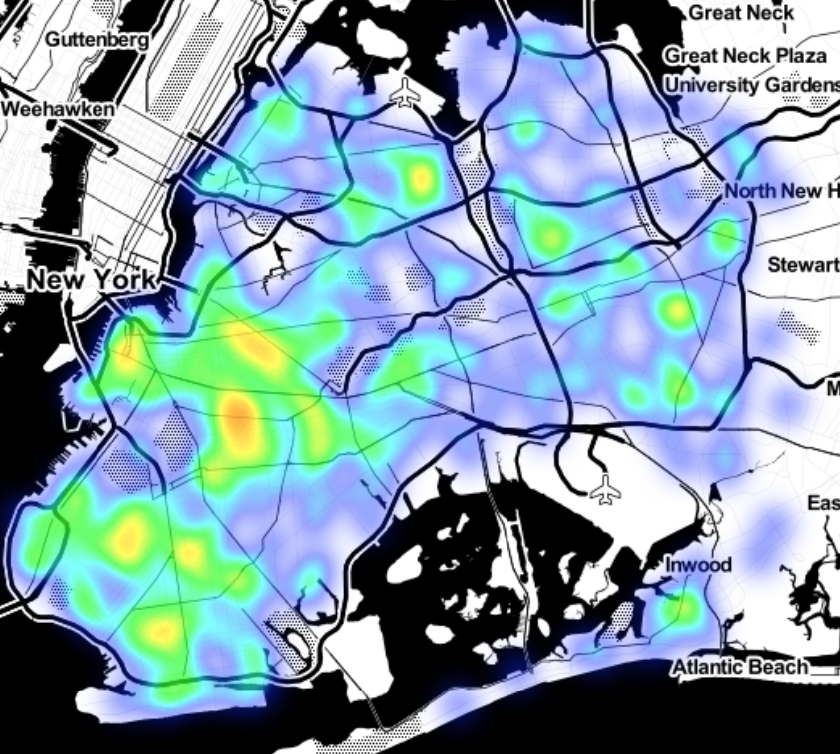


#### In the Bay Ridge area, a 1-bedroom apartment [costs](https://https://www.zumper.com/rent-research/new-york-ny/bay-ridge) $1,701 per month. 

#### Borough Park's average rent is $1,910 (1). 

#### Sunset Park sits at $1,550 for a 1 bedroom (2), Prospect Park has an average of $2,965 (3), and Bensonhurst is $1,906.

#### Looking into the socioeconomic status of the area is important to find harm — are the students experiencing delays located in low-income neighborhoods or areas? In this case, it looks as though that is not the case, ultimately disproving our hypothesis. But still, why are these areas affected? *We would find this answer through interviews and conversations with the OPT, transportation vendors, or family members*




***NOTE (to Mark): for some reason the hyperlinking is getting messed up so we are leaving the links underneath with corresponding numbers:***

(1): https://www.rentcafe.com/average-rent-market-trends/us/ny/brooklyn/

(2): https://www.zumper.com/rent-research/new-york-ny/sunset-park

(3): https://www.rentcafe.com/average-rent-market-trends/us/ny/brooklyn/

In [ ]:
# Brooklyn has the highest intensity of bus delays
map['Borough'].value_counts()

Brooklyn          1136
Queens             502
Bronx              223
Staten Island       29
LIVINGSTON          10
Glen Cove           10
GLEN COVE            9
TEANECK              9
ELMONT               6
ALBERTSON            5
VALHALLA             5
YONKERS              4
WOODBURY             4
WOODMERE             3
WEST HEMPSTEAD       3
Valley Stream        3
RYE BROOK            3
FREEPORT             2
HAWTHORNE            2
UPPER NYACK          1
Hartsdale            1
Teaneck              1
INWOOD               1
Woodbury             1
ROOSEVELT            1
CEDARHURST           1
Name: Borough, dtype: int64

In [ ]:
map.groupby("VendorName")["Borough"].value_counts()

VendorName                     Borough       
ALL AMERICAN SCHOOL BUS CORP.  Brooklyn           6
                               Queens             3
                               Glen Cove          1
ALLIED TRANSIT CORP.           Brooklyn          32
                               Queens             8
                                                 ..
THOMAS BUSES, INC. (B2321)     WEST HEMPSTEAD     1
VAN TRANS LLC (B2192)          Bronx             11
                               ALBERTSON          1
VINNY`S BUS SERVICES (B2321)   Staten Island      1
Y & M TRANSIT CORP (B2192)     Brooklyn          81
Name: Borough, Length: 96, dtype: int64

In [ ]:
# Does Brooklyn experience the longest delays?
map.groupby("Delay")["Borough"].value_counts()

Delay      Borough       
0-15 Min   Brooklyn           38
           Bronx              15
           Queens             15
           Staten Island       6
           Glen Cove           1
           LIVINGSTON          1
           Valley Stream       1
           Woodbury            1
16-30 Min  Brooklyn          316
           Bronx              61
           Queens             41
           Staten Island      10
           GLEN COVE           6
           ALBERTSON           3
           ELMONT              1
           FREEPORT            1
           Glen Cove           1
           LIVINGSTON          1
           Teaneck             1
           VALHALLA            1
           WOODBURY            1
           YONKERS             1
31-45 Min  Brooklyn          213
           Queens             63
           Bronx              42
           TEANECK             7
           LIVINGSTON          4
           Staten Island       3
           GLEN COVE           2
           VALHAL

## What would our next steps look like?

1.   Why is the Manhattan data missing. Why would there be no bus delays because of mechanical problems in all of lower and midtown Manhattan?
2.   We also would include interviews from families and students who are impacted by the bus delay. How does this effect their everyday lives? Does this impact their child's education?
3.   Why are certain areas more impacted by mechanical problems? Is this because the companies they are choosing are less expensive, let's say, as the one's used by Manhattan schools (if the data is correct and they don't experience this delay reason)?
4.   Are there many subway stops near the schools in Brooklyn or are they difficult to access for younger children?